In [83]:
import numpy as np
import pandas as pd

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [84]:
sLogDir = "log"
ylim_loss = (0.0,5.0)

In [101]:
def acc_loss_show(sLogFile, sDescription, nEpoch=1000):
    print(sDescription)
    
    dfLog = pd.read_csv(sLogDir + "/" + sLogFile)
    print("Validation set: max accuracy %.2f | min loss %.3f" % (dfLog.val_acc.max(), dfLog.val_loss.min()))
    print("\n", dfLog.tail())
    
    plt.plot(dfLog.epoch, dfLog.acc, label="Training accuracy")
    plt.plot(dfLog.epoch, dfLog.val_acc, label="Validation accuracy")

    if nEpoch == 0: nEpoch = len(dfLog)
    plt.xlim((0,nEpoch))
    plt.ylim((0,1))
    plt.legend()
    plt.show()
    
    plt.plot(dfLog.epoch, dfLog.loss, label="Training loss")
    plt.plot(dfLog.epoch, dfLog.val_loss, label="Validation loss")

    plt.xlim((0,nEpoch))
    plt.ylim(ylim_loss)
    plt.legend()
    plt.show()
    
    return

Min 18 occurences per class, lr=1e-5
Validation set: max accuracy 0.47 | min loss 2.597

      epoch       acc      loss   val_acc  val_loss
995    995  0.974286  0.077135  0.411111  3.977330
996    996  0.977143  0.085303  0.444444  3.983589
997    997  0.971429  0.096001  0.444444  4.029945
998    998  0.965714  0.113438  0.422222  4.024111
999    999  0.974286  0.112012  0.433333  3.958510


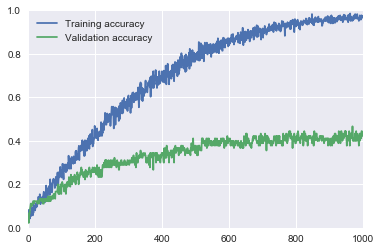

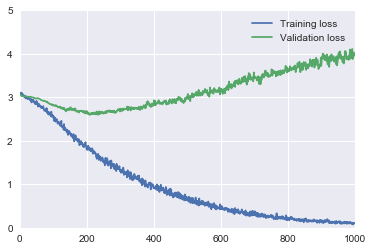

In [102]:
acc_loss_show("20180522-1810-lstm-440in21.log",
    "Min 18 occurences per class, lr=1e-5")

Min 10 occurences per class, lr=1e-3 => too many classes? 

    epoch       acc      loss   val_acc  val_loss
35     35  0.004616  6.369325  0.004923  6.365276
36     36  0.004616  6.369295  0.004923  6.365240
37     37  0.004616  6.369311  0.004923  6.365228
38     38  0.004616  6.369282  0.004923  6.365214
39     39  0.004616  6.369292  0.004923  6.365188


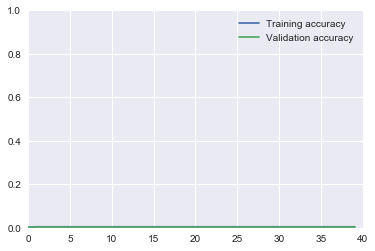

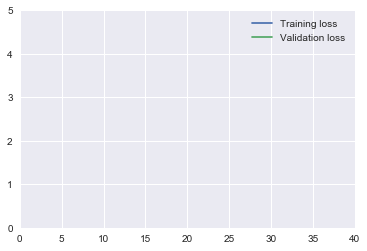

In [87]:
acc_loss_show("20180524-1958-lstm-7271in593.acc",
    "Min 10 occurences per class, lr=1e-3 => too many classes?", 0)

Min 15 occurences per class, lr=1e-3 => hmmmm, perhaps lr too large? 

     epoch       acc      loss   val_acc  val_loss
195    195  0.023256  4.429909  0.024823  4.428498
196    196  0.023256  4.430006  0.024823  4.428453
197    197  0.023256  4.429987  0.024823  4.428490
198    198  0.023256  4.429958  0.024823  4.428487
199    199  0.023256  4.429930  0.024823  4.428492


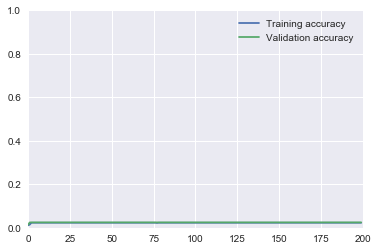

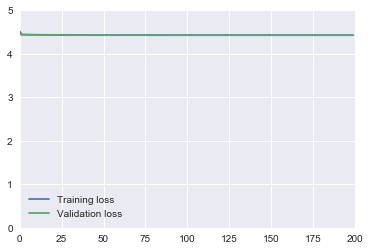

In [88]:
acc_loss_show("20180524-2112-lstm-1443in85.acc",
    "Min 15 occurences per class, lr=1e-3 => hmmmm, perhaps lr too large?", 200)

### Retest original small 440in21 dataset

Min 18 occurences per class, dropout=0.1, lr=1e-3 => worse then original 

     epoch       acc      loss   val_acc  val_loss
134    134  0.968571  0.114739  0.155556  6.081243
135    135  0.977143  0.086550  0.222222  6.039211
136    136  0.991429  0.049603  0.211111  6.104008
137    137  0.985714  0.051649  0.188889  6.183263
138    138  0.982857  0.073797  0.211111  6.092296


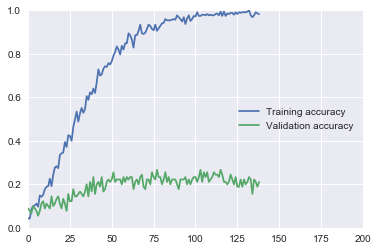

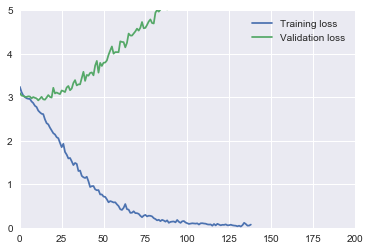

In [89]:
acc_loss_show("20180525-0557-lstm-440in21.acc",
    "Min 18 occurences per class, dropout=0.1, lr=1e-3 => worse then original", 200)

Min 18 occurences per class, dropout=0.5, lr=1e-3 => still worse 

     epoch       acc      loss   val_acc  val_loss
154    154  0.602857  1.144907  0.200000  4.139519
155    155  0.605714  1.091959  0.200000  4.373961
156    156  0.634286  1.105836  0.155556  4.370468
157    157  0.608571  1.112014  0.155556  4.052622
158    158  0.608571  1.116614  0.144444  4.371458


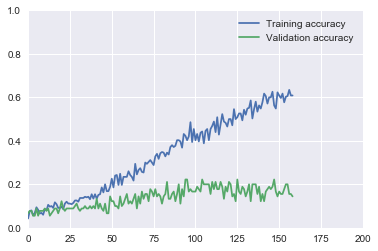

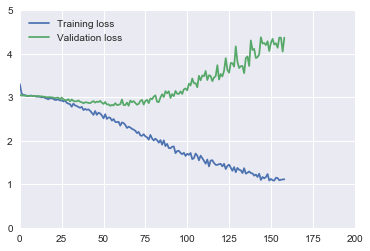

In [90]:
acc_loss_show("20180525-0605-lstm-440in21.acc",
    "Min 18 occurences per class, dropout=0.5, lr=1e-3 => still worse", 200)

Min 18 occurences per class, dropout=0.5, lr=1e-4 => val_acc again close to 40% 

     epoch       acc      loss   val_acc  val_loss
133    133  0.951429  0.161257  0.377778  3.303837
134    134  0.945714  0.173622  0.377778  3.376909
135    135  0.948571  0.147349  0.377778  3.300802
136    136  0.960000  0.135942  0.344444  3.384722
137    137  0.948571  0.173550  0.377778  3.554307


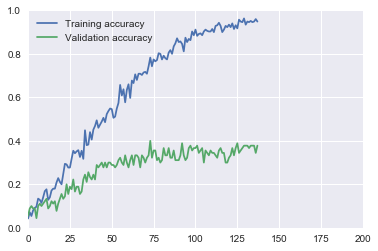

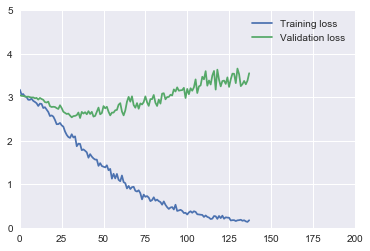

In [91]:
acc_loss_show("20180525-0613-lstm-440in21.acc",
    "Min 18 occurences per class, dropout=0.5, lr=1e-4 => val_acc again close to 40%", 200)

Min 18 occurences per class, dropout=0.5, lr=1e-5 (almost original parameters) 

     epoch       acc      loss   val_acc  val_loss
195    195  0.448571  1.774598  0.266667  2.734764
196    196  0.445714  1.820756  0.288889  2.700119
197    197  0.434286  1.824053  0.266667  2.736422
198    198  0.434286  1.856322  0.288889  2.699093
199    199  0.405714  1.882372  0.266667  2.710432


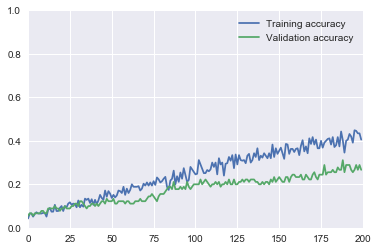

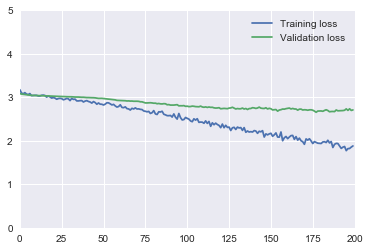

In [92]:
acc_loss_show("20180525-0619-lstm-440in21.acc",
    "Min 18 occurences per class, dropout=0.5, lr=1e-5 (almost original parameters)", 200)

Min 18 occurences per class, dropout=0.2, lr=1e-4 => lower dropout => faster and does not hurt performance 

     epoch       acc      loss   val_acc  val_loss
106    106  0.977143  0.066431  0.377778  3.486550
107    107  0.974286  0.066062  0.333333  3.519605
108    108  0.982857  0.053157  0.344444  3.437385
109    109  0.977143  0.085777  0.388889  3.493584
110    110  0.982857  0.066122  0.377778  3.460037


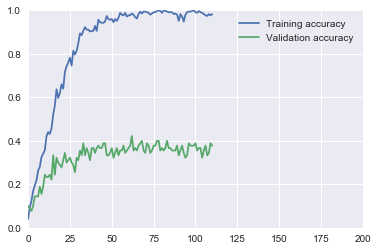

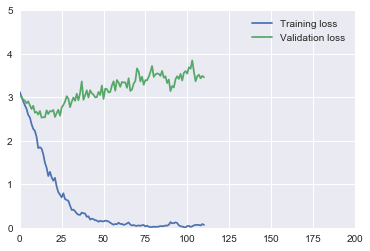

In [93]:
acc_loss_show("20180525-0629-lstm-440in21.acc",
    "Min 18 occurences per class, dropout=0.2, lr=1e-4 => lower dropout => faster and does not hurt performance", 200)

Min 18 occurences per class, dropout=0.2, lr=1e-5 => lower dropout reduces val_acc but much faster 

     epoch       acc      loss   val_acc  val_loss
195    195  0.954286  0.214660  0.355556  3.387228
196    196  0.960000  0.180908  0.344444  3.480031
197    197  0.937143  0.232454  0.333333  3.499494
198    198  0.962857  0.200378  0.355556  3.499507
199    199  0.954286  0.186470  0.344444  3.483769


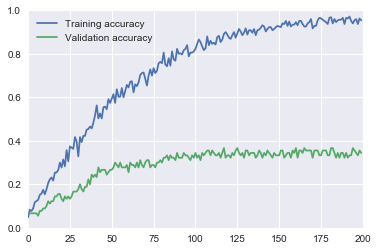

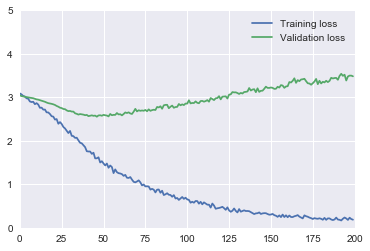

In [94]:
acc_loss_show("20180525-0634-lstm-440in21.acc",
    "Min 18 occurences per class, dropout=0.2, lr=1e-5 => lower dropout reduces val_acc but much faster", 200)

Min 18 occ, only 1 dense layer, dropout=0.5, lr=1e-4 

     epoch       acc      loss   val_acc  val_loss
164    164  1.000000  0.014895  0.344444  4.017573
165    165  1.000000  0.013811  0.366667  3.932768
166    166  1.000000  0.012316  0.377778  4.148563
167    167  0.997143  0.017881  0.377778  4.204028
168    168  0.994286  0.035132  0.311111  4.066228


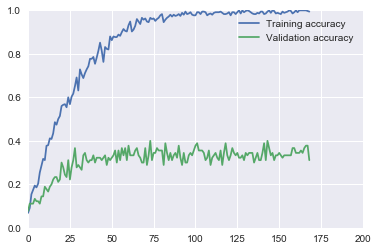

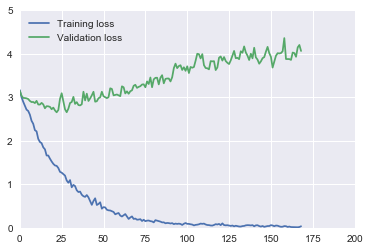

In [95]:
acc_loss_show("20180525-0654-lstm-440in21.acc",
    "Min 18 occ, only 1 dense layer, dropout=0.5, lr=1e-4", 200)

Min 18 occ, only 1 dense layer, dropout=0.5, lr=1e-5 => unclear if significantly better than 2 dense layers? 

     epoch       acc      loss   val_acc  val_loss
195    195  0.694286  0.992198  0.322222  2.813328
196    196  0.740000  0.892400  0.322222  2.861393
197    197  0.748571  0.883145  0.333333  2.834170
198    198  0.745714  0.896820  0.333333  2.795820
199    199  0.762857  0.881479  0.333333  2.820678


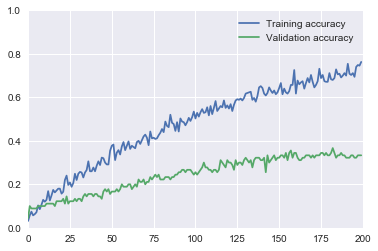

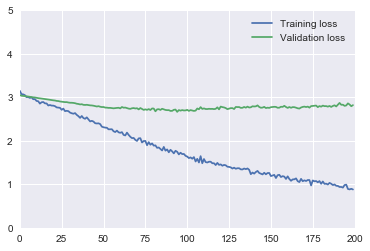

In [96]:
acc_loss_show("20180525-0702-lstm-440in21.acc",
    "Min 18 occ, only 1 dense layer, dropout=0.5, lr=1e-5 => unclear if significantly better than 2 dense layers?", 200)

### => Conduct further trainings on LedaSila with 2 dense layers, dropout = 0.5, learning rate = 1e-4

Min 15 occ, lr=1e-4 => only 10% val_acc :( 

     epoch       acc      loss   val_acc  val_loss
145    145  0.894918  0.397258  0.106383  5.828169
146    146  0.895780  0.392226  0.109929  5.783189
147    147  0.898363  0.388134  0.106383  5.799855
148    148  0.895780  0.393470  0.120567  5.774839
149    149  0.894057  0.375307  0.124113  5.868580


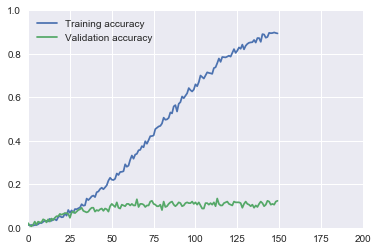

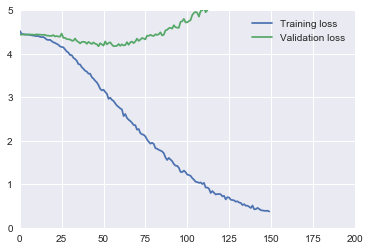

In [97]:
acc_loss_show("20180525-0806-lstm-1443in85.acc",
    "Min 15 occ, lr=1e-4 => only 10% val_acc :(", 200)

### Try stacked LSTM on LedaSila-440in21

Min 18 occ, 2 LSTM, lr=1e-4
Validation set: max accuracy 0.46 | min loss 2.499

     epoch       acc      loss   val_acc  val_loss
73     73  0.911429  0.300669  0.366667  3.297463
74     74  0.908571  0.278984  0.400000  3.369027
75     75  0.920000  0.245299  0.455556  3.229833
76     76  0.908571  0.254219  0.433333  3.315779
77     77  0.908571  0.241002  0.344444  3.510990


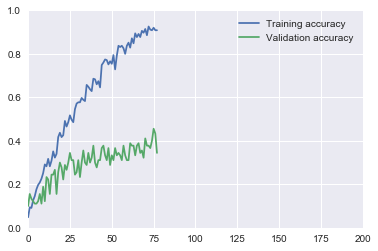

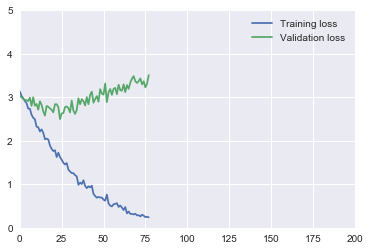

In [106]:
acc_loss_show("20180525-0940-lstm-440in21.acc",
    "Min 18 occ, 2 LSTM, lr=1e-4", 200)